In [326]:
# we need to fix the event mixing problem in the reponse matrix 
# and the mother-daughter link is required to fix this problem  

import uproot
#import pandas
import argparse
import awkward as ak 
import matplotlib 
import matplotlib.pyplot as plt 
import numpy as np
import mplhep as hep
from tqdm import trange
import time 
import hist

### Open the Delphes ROOT file

In [308]:
delphes = uproot.open("/eos/purdue/store/user/abakshi/TTBar_Delphes/TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root")
ntuple = uproot.open("../Ntuples/ntuple_TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root")
#hist_output = uproot.open("../HistogramOutput/histogram_TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1_HLLHC.root")
#minitree = uproot.open("../MiniTreeOutput/minitree_TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root")

In [263]:
ntuple['Delphes_Ntuples;1'].keys()

['evt_size',
 'weight_size',
 'weight',
 'rho_size',
 'rho',
 'vtx_size',
 'vtx_x',
 'vtx_y',
 'vtx_z',
 'vtx_t',
 'vtx_pt2',
 'gamma_size',
 'gamma_pt',
 'gamma_eta',
 'gamma_phi',
 'gamma_mass',
 'elec_size',
 'elec_pt',
 'elec_eta',
 'elec_phi',
 'elec_mass',
 'elec_charge',
 'elec_sum_pt',
 'elec_reliso',
 'muon_size',
 'muon_pt',
 'muon_eta',
 'muon_phi',
 'muon_mass',
 'muon_charge',
 'muon_sum_pt',
 'muon_reliso',
 'jet_size',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_mass',
 'jet_btag',
 'met_size',
 'met_pt',
 'met_phi',
 'met_eta',
 'scalar_ht_size',
 'scalar_ht',
 'genpart_size',
 'genpart_pid',
 'genpart_status',
 'genpart_m1',
 'genpart_m2',
 'genpart_d1',
 'genpart_d2',
 'genpart_pt',
 'genpart_eta',
 'genpart_phi',
 'genpart_mass',
 'genpart_charge',
 'genjet_size',
 'genjet_pt',
 'genjet_eta',
 'genjet_phi',
 'genjet_mass']

### AJ wants tau and bquark p_t, eta and phi, and MET eta to be stored in the ntuple

In [ ]:
solns_matrix = [[] for n in trange(len(pdgIDs))]

for i in trange(len(pdgIDs)):
    values = pdgIDs[i]
    pattern = [24, 5]
    N = len(pattern)
    possibles = np.where(values == pattern[0])[0]
    
    solns = []
    for p in possibles:
        check = values[p:p+N]
        if np.all(check == pattern):
            solns.append(p)
    
    solns_matrix[i] = solns        

 62%|██████▏   | 73117/118424 [01:38<01:00, 749.41it/s]

In [309]:
list(pdgIDs[0])

[-3,
 3,
 6,
 -6,
 6,
 -6,
 -6,
 6,
 -6,
 6,
 -6,
 -6,
 6,
 -6,
 6,
 -6,
 5,
 24,
 5,
 24,
 5,
 5,
 5,
 -5,
 -24,
 -5,
 -24,
 -5,
 -24,
 22,
 -5,
 -13,
 14,
 13,
 -14,
 13,
 22,
 -14,
 5,
 -511,
 -5,
 -5122,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 11,
 -11,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 13,
 -14,
 22,
 22,
 22,
 22]

In [268]:
list(ntuple['Delphes_Ntuples;1']['muon_pt'].array())

[<Array [21.5] type='1 * float32'>,
 <Array [46] type='1 * float32'>,
 <Array [21.5] type='1 * float32'>,
 <Array [80, 42.8] type='2 * float32'>,
 <Array [66.2] type='1 * float32'>,
 <Array [] type='0 * float32'>,
 <Array [] type='0 * float32'>,
 <Array [] type='0 * float32'>,
 <Array [9.54] type='1 * float32'>,
 <Array [92.9, 21.6] type='2 * float32'>,
 <Array [65.2] type='1 * float32'>,
 <Array [] type='0 * float32'>,
 <Array [25.1] type='1 * float32'>,
 <Array [27.5] type='1 * float32'>,
 <Array [52.2, 51.1, 2.18] type='3 * float32'>,
 <Array [40.7, 11.5] type='2 * float32'>,
 <Array [] type='0 * float32'>,
 <Array [55.7] type='1 * float32'>,
 <Array [2.08] type='1 * float32'>,
 <Array [] type='0 * float32'>,
 <Array [72.8] type='1 * float32'>,
 <Array [29.8, 22.1] type='2 * float32'>,
 <Array [14.1] type='1 * float32'>,
 <Array [] type='0 * float32'>,
 <Array [] type='0 * float32'>,
 <Array [39.4] type='1 * float32'>,
 <Array [56.2, 31.6] type='2 * float32'>,
 <Array [] type='0 * f

In [258]:
met_eta = ntuple['Delphes_Ntuples;1']['met_eta'].array()

In [259]:
list(met_eta)

[<Array [3.79] type='1 * float32'>,
 <Array [-2.18] type='1 * float32'>,
 <Array [2.76] type='1 * float32'>,
 <Array [4.27] type='1 * float32'>,
 <Array [-3.49] type='1 * float32'>,
 <Array [1.22] type='1 * float32'>,
 <Array [-2.46] type='1 * float32'>,
 <Array [-2.11] type='1 * float32'>,
 <Array [-2.01] type='1 * float32'>,
 <Array [-1.92] type='1 * float32'>,
 <Array [0.106] type='1 * float32'>,
 <Array [-0.92] type='1 * float32'>,
 <Array [-4.58] type='1 * float32'>,
 <Array [3.36] type='1 * float32'>,
 <Array [-2.53] type='1 * float32'>,
 <Array [-2.03] type='1 * float32'>,
 <Array [3.16] type='1 * float32'>,
 <Array [-2.97] type='1 * float32'>,
 <Array [2.89] type='1 * float32'>,
 <Array [2.43] type='1 * float32'>,
 <Array [3.45] type='1 * float32'>,
 <Array [2.88] type='1 * float32'>,
 <Array [-2.53] type='1 * float32'>,
 <Array [2.98] type='1 * float32'>,
 <Array [-2.73] type='1 * float32'>,
 <Array [3.61] type='1 * float32'>,
 <Array [1.67] type='1 * float32'>,
 <Array [-2.58

In [262]:
delphes["Delphes;1"].keys()

['Event',
 'Event/Event.fUniqueID',
 'Event/Event.fBits',
 'Event/Event.Number',
 'Event/Event.ReadTime',
 'Event/Event.ProcTime',
 'Event/Event.ProcessID',
 'Event/Event.MPI',
 'Event/Event.Weight',
 'Event/Event.Scale',
 'Event/Event.AlphaQED',
 'Event/Event.AlphaQCD',
 'Event/Event.ID1',
 'Event/Event.ID2',
 'Event/Event.X1',
 'Event/Event.X2',
 'Event/Event.ScalePDF',
 'Event/Event.PDF1',
 'Event/Event.PDF2',
 'Event_size',
 'Weight',
 'Weight/Weight.fUniqueID',
 'Weight/Weight.fBits',
 'Weight/Weight.Weight',
 'Weight_size',
 'Particle',
 'Particle/Particle.fUniqueID',
 'Particle/Particle.fBits',
 'Particle/Particle.PID',
 'Particle/Particle.Status',
 'Particle/Particle.IsPU',
 'Particle/Particle.M1',
 'Particle/Particle.M2',
 'Particle/Particle.D1',
 'Particle/Particle.D2',
 'Particle/Particle.Charge',
 'Particle/Particle.Mass',
 'Particle/Particle.E',
 'Particle/Particle.Px',
 'Particle/Particle.Py',
 'Particle/Particle.Pz',
 'Particle/Particle.P',
 'Particle/Particle.PT',
 'Par

### Define Delphes Items & Particle Filters

In [159]:
weights = delphes['Delphes;1']['Event/Event.Weight'].array()
pdgIDs = delphes['Delphes;1']['Particle/Particle.PID'].array()
status = delphes['Delphes;1']['Particle/Particle.Status'].array()
first_mother = delphes['Delphes;1']['Particle/Particle.M1'].array()
second_mother = delphes['Delphes;1']['Particle/Particle.M2'].array()
first_daughter = delphes['Delphes;1']['Particle/Particle.D1'].array()
second_daughter = delphes['Delphes;1']['Particle/Particle.D2'].array()
E = delphes['Delphes;1']['Particle/Particle.E'].array()
px = delphes['Delphes;1']['Particle/Particle.Px'].array()
py = delphes['Delphes;1']['Particle/Particle.Py'].array()
pz = delphes['Delphes;1']['Particle/Particle.Pz'].array() 

is_t = pdgIDs == 6
is_tbar = pdgIDs == -6
#is_e = pdgIDs == 11
#is_ebar = pdgIDs == -11

In [275]:
len(pdgIDs)

118424

In [276]:
list(status)

[<Array [21, 21, 22, 22, 44, ... 1, 1, 1, 1, 1] type='128 * int32'>,
 <Array [21, 21, 22, 22, 44, ... 1, 1, 1, 1, 1] type='292 * int32'>,
 <Array [21, 21, 22, 22, 44, ... 1, 1, 1, 1, 1] type='180 * int32'>,
 <Array [21, 21, 22, 22, 44, ... 1, 1, 1, 1, 1] type='205 * int32'>,
 <Array [21, 21, 22, 22, 44, ... 1, 1, 1, 1, 1] type='229 * int32'>,
 <Array [21, 21, 22, 22, 44, ... 1, 1, 1, 1, 1] type='226 * int32'>,
 <Array [21, 21, 22, 22, 23, ... 1, 1, 1, 1, 1] type='356 * int32'>,
 <Array [21, 21, 22, 22, 44, ... 1, 1, 1, 1, 1] type='340 * int32'>,
 <Array [21, 21, 22, 22, 23, ... 1, 1, 1, 1, 1] type='325 * int32'>,
 <Array [21, 21, 22, 22, 23, ... 1, 1, 1, 1, 1] type='299 * int32'>,
 <Array [21, 21, 22, 22, 44, ... 1, 1, 1, 1, 1] type='278 * int32'>,
 <Array [21, 21, 22, 22, 44, ... 1, 1, 1, 1, 1] type='335 * int32'>,
 <Array [21, 21, 22, 22, 23, ... 1, 1, 1, 1, 1] type='197 * int32'>,
 <Array [21, 21, 22, 22, 23, ... 1, 1, 1, 1, 1] type='277 * int32'>,
 <Array [21, 21, 22, 22, 44, ... 1

In [274]:
list(pdgIDs)

[<Array [-3, 3, 6, -6, 6, ... 22, 22, 22, 22] type='128 * int32'>,
 <Array [21, 21, 6, -6, 6, ... 22, 22, 22, 22] type='292 * int32'>,
 <Array [21, 21, 6, -6, 6, ... 22, 22, 22, 22] type='180 * int32'>,
 <Array [21, 21, 6, -6, 6, ... 22, 22, 22, 22] type='205 * int32'>,
 <Array [2, -2, 6, -6, 6, ... -11, 12, 22, 22] type='229 * int32'>,
 <Array [21, 21, 6, -6, 6, ... 22, 22, 22, 22] type='226 * int32'>,
 <Array [-4, 21, 6, -6, -4, ... 22, 22, 22, 22] type='356 * int32'>,
 <Array [21, 21, 6, -6, 6, ... 22, 22, 22, 22] type='340 * int32'>,
 <Array [21, 21, 6, -6, 21, ... 22, 22, 22, 22] type='325 * int32'>,
 <Array [21, 21, 6, -6, 21, ... 22, 22, 11, -12] type='299 * int32'>,
 <Array [21, 21, 6, -6, 6, ... 22, 22, 22, 22] type='278 * int32'>,
 <Array [21, 21, 6, -6, 6, ... 22, 22, 22, 22] type='335 * int32'>,
 <Array [1, 21, 6, -6, 1, ... 22, 22, 22, 22] type='197 * int32'>,
 <Array [1, 21, 6, -6, 21, ... 22, 22, 22, 22] type='277 * int32'>,
 <Array [21, 21, 6, -6, 6, ... 22, 22, 13, -14

In [105]:
list(first_daughter[pdgIDs==24])

[<Array [120, 156] type='2 * int32'>,
 <Array [772] type='1 * int32'>,
 <Array [331] type='1 * int32'>,
 <Array [339] type='1 * int32'>,
 <Array [415] type='1 * int32'>,
 <Array [367, 388] type='2 * int32'>,
 <Array [1023, 1047] type='2 * int32'>,
 <Array [757, 772] type='2 * int32'>,
 <Array [1008, 1035] type='2 * int32'>,
 <Array [688] type='1 * int32'>,
 <Array [580, 613] type='2 * int32'>,
 <Array [918, 939] type='2 * int32'>,
 <Array [272, 299] type='2 * int32'>,
 <Array [596, 665] type='2 * int32'>,
 <Array [828, 849] type='2 * int32'>,
 <Array [786, 801] type='2 * int32'>,
 <Array [609, 660] type='2 * int32'>,
 <Array [675, 714] type='2 * int32'>,
 <Array [677] type='1 * int32'>,
 <Array [917, 932] type='2 * int32'>,
 <Array [500, 557] type='2 * int32'>,
 <Array [596, 623] type='2 * int32'>,
 <Array [716, 737] type='2 * int32'>,
 <Array [500, 533] type='2 * int32'>,
 <Array [387, 441] type='2 * int32'>,
 <Array [337, 364] type='2 * int32'>,
 <Array [201] type='1 * int32'>,
 <Arr

In [73]:
list(first_daughter[pdgIDs==24]<ak.num(pdgIDs))

[<Array [True, False] type='2 * bool'>,
 <Array [False] type='1 * bool'>,
 <Array [False] type='1 * bool'>,
 <Array [False] type='1 * bool'>,
 <Array [False] type='1 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False] type='1 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False] type='1 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False, False] type='2 * bool'>,
 <Array [False, Fa

In [109]:
list(first_daughter[pdgIDs==24][first_daughter[pdgIDs==24]<ak.num(pdgIDs)])

[<Array [120] type='1 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array [] type='0 * int32'>,
 <Array

### The Proper Approach for HLLHC so that the Dimensions of the pdgIDs Arrays Match

In [233]:
wplus_first_daughter_index = first_daughter[pdgIDs==24][first_daughter[pdgIDs==24]<ak.num(pdgIDs)]
wplus_first_daughter = pdgIDs[wplus_first_daughter_index] 
wplus_second_daughter_index = second_daughter[pdgIDs==24][second_daughter[pdgIDs==24]<ak.num(pdgIDs)]
wplus_second_daughter = pdgIDs[wplus_second_daughter_index]

wminus_first_daughter_index = first_daughter[pdgIDs==24][first_daughter[pdgIDs==24]<ak.num(pdgIDs)]

In [253]:
#list(pdgIDs[wplus_first_daughter_index])

In [250]:
len(pdgIDs)

118424

In [247]:
ak.count(wplus_first_daughter[wplus_first_daughter==-11])

39

In [248]:
ak.count(wplus_second_daughter[wplus_second_daughter==-11])

46

### Filtered Kinematic Properties

In [249]:
ebar_E = E[wplus_first_daughter_index][wplus_first_daughter==-11]
ebar_px = px[wplus_first_daughter_index][wplus_first_daughter==-11]
ebar_py = py[wplus_first_daughter_index][wplus_first_daughter==-11]
ebar_pz = pz[wplus_first_daughter_index][wplus_first_daughter==-11]



In [7]:
## Mother is W_plus or W_minus
##mother_is_wplus = (ak.mask(pdgIDs, ak.fill_none(ak.mask(pdgIDs, first_mother<ak.num(pdgIDs, axis=1)), False)==24)) | (ak.mask(pdgIDs, ak.fill_none(ak.mask(pdgIDs, second_mother<ak.num(pdgIDs, axis=1)), False)==24))
#mother_is_wplus = np.logical_or(ak.fill_none((pdgIDs[ak.mask(first_mother, first_mother<ak.num(pdgIDs))]==24)==True, False), ak.fill_none(pdgIDs[ak.mask(second_mother, second_mother!=-1)==24], False))
#mother_is_wminus = np.logical_or(ak.fill_none(pdgIDs[ak.mask(first_mother, first_mother<ak.num(pdgIDs))]==-24, False), ak.fill_none(pdgIDs[ak.mask(second_mother, second_mother!=-1)==-24], False))

## Wplus or Wminus with Lepton Mask
#wplus_with_ebar_daughters_mask = (ak.fill_none(ak.mask(pdgIDs, mother_is_wplus), False) == -11)
#wminus_with_e_daughters_mask = (ak.fill_none(ak.mask(pdgIDs, mother_is_wminus), False) == 11)

### Top with Wplus Daughter or Anti-top with Wminus Daughter
##top_with_wplus_daughter_mask = np.logical_or(ak.fill_none(pdgIDs[ak.mask(ak.mask(first_daughter, is_top), ak.mask(first_daughter, is_top)<ak.num(pdgIDs, axis=1))]==24, False),
##                                             ak.fill_none(pdgIDs[ak.mask(ak.mask(second_daughter, is_top), ak.mask(second_daughter, is_top)<ak.num(pdgIDs, axis=1))]==24, False))
##antitop_with_wminus_daughter_mask = np.logical_or(ak.fill_none(pdgIDs[ak.mask(ak.mask(first_daughter, is_antitop), ak.mask(first_daughter, is_antitop)<ak.num(pdgIDs, axis=1))]==-24, False),
##                                             ak.fill_none(pdgIDs[ak.mask(ak.mask(second_daughter, is_antitop), ak.mask(second_daughter, is_antitop)<ak.num(pdgIDs, axis=1))]==-24, False))


In [172]:
list(ak.mask(pdgIDs, pdgIDs==11))

[<Array [None, None, None, ... None, None, None] type='128 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='292 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='180 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='205 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='229 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='226 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='356 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='340 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='325 * ?int32'>,
 <Array [None, None, None, ... None, 11, None] type='299 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='278 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='335 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='197 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='277 * ?int32'>,
 <Array 

## Problem Found:  electrons outside the length of pdgIDs arrays 
We shall check: <br>
If the daughter of W is a lepton and outside the pdgIDs array length, then discard the lepton. <br>
Find the fraction of this condition among all events. 

In [167]:
list(first_daughter[is_t][first_daughter[is_t]<ak.num(pdgIDs)])

[<Array [8, 16, 26, 59, 86, 116] type='6 * int32'>,
 <Array [8, 13, 19, 36] type='4 * int32'>,
 <Array [8, 13, 26, 39, 48, 57] type='6 * int32'>,
 <Array [8, 13, 23, 30, 38, 52, 99, 105] type='8 * int32'>,
 <Array [8, 13, 32, 42, 70, 78, 123, 126] type='8 * int32'>,
 <Array [8, 13, 31, 55, 113, 140] type='6 * int32'>,
 <Array [9, 15, 160, 239, 310] type='5 * int32'>,
 <Array [8, 13, 31, 46, 280] type='5 * int32'>,
 <Array [9, 15, 20, 69, 90, 205] type='6 * int32'>,
 <Array [9, 15, 22, 33, ... 120, 123, 179, 230] type='11 * int32'>,
 <Array [8, 13, 19, 119, 203, 232] type='6 * int32'>,
 <Array [8, 17, 32, 43, 114] type='5 * int32'>,
 <Array [9, 15, 22, 111, 153] type='5 * int32'>,
 <Array [11, 19, 49, 75, 117, 188, 261] type='7 * int32'>,
 <Array [8, 13, 19, 26, ... 83, 142, 198, 285] type='10 * int32'>,
 <Array [8, 13, 48, 106, 190, 261, 293, 312] type='8 * int32'>,
 <Array [8, 13, 61] type='3 * int32'>,
 <Array [9, 18, 26, 35, 51, 114, 201] type='7 * int32'>,
 <Array [8, 22, 28, 35, .

In [202]:
mother_is_wplus = (pdgIDs[first_mother<ak.num(pdgIDs)]==24)
mother_is_wminus = (pdgIDs[first_mother<ak.num(pdgIDs)]==-24)

wplus_with_ebar_daughters_mask = (pdgIDs[first_mother<ak.num(pdgIDs)][mother_is_wplus] == 11)
wminus_with_e_daughters_mask = (pdgIDs[first_mother<ak.num(pdgIDs)][mother_is_wminus] == -11)

top_with_wplus_daughter_mask = (pdgIDs[first_daughter[is_t][first_daughter[is_t]<ak.num(pdgIDs)]] == 24)
antitop_with_wminus_daughter_mask = (pdgIDs[first_daughter[is_tbar][first_daughter[is_tbar]<ak.num(pdgIDs)]] == -24) 

In [206]:
list(pdgIDs[first_mother<ak.num(pdgIDs)])

[<Array [-3, 3, 6, -6, 6, ... -5, -24, -13, 14] type='27 * int32'>,
 <Array [21, 21, 6, -6, 6, ... 4, 4, -4, 6, -6] type='23 * int32'>,
 <Array [21, 21, 6, -6, 6, ... 6, 6, -6, 6, -6] type='18 * int32'>,
 <Array [21, 21, 6, -6, 6, ... 6, -6, -6, 6, -6] type='23 * int32'>,
 <Array [2, -2, 6, -6, 6, ... 6, 6, -6, 6, 22] type='20 * int32'>,
 <Array [21, 21, 6, -6, 6, ... 6, -6, 6, 6, -6] type='20 * int32'>,
 <Array [-4, 21, 6, -6, -4, ... 6, -4, 4, -4] type='41 * int32'>,
 <Array [21, 21, 6, -6, 6, ... 5, -5, -4, 4, 6] type='45 * int32'>,
 <Array [21, 21, 6, -6, 21, ... 6, -6, 22, -4] type='27 * int32'>,
 <Array [21, 21, 6, -6, 21, ... -6, 6, 6, -6, 6] type='25 * int32'>,
 <Array [21, 21, 6, -6, 6, ... 6, 6, -6, -4, 4] type='26 * int32'>,
 <Array [21, 21, 6, -6, 6, ... 4, 6, -6, 4, -4] type='26 * int32'>,
 <Array [1, 21, 6, -6, 1, ... -4, -4, 6, -6, 4] type='29 * int32'>,
 <Array [1, 21, 6, -6, 21, ... 4, -6, 6, 22, -4] type='28 * int32'>,
 <Array [21, 21, 6, -6, 6, ... 6, -6, 6, 6, -6] t

In [203]:
list(mother_is_wplus)

[<Array [False, False, False, ... False, False] type='27 * bool'>,
 <Array [False, False, False, ... False, False] type='23 * bool'>,
 <Array [False, False, False, ... False, False] type='18 * bool'>,
 <Array [False, False, False, ... False, False] type='23 * bool'>,
 <Array [False, False, False, ... False, False] type='20 * bool'>,
 <Array [False, False, False, ... False, False] type='20 * bool'>,
 <Array [False, False, False, ... False, False] type='41 * bool'>,
 <Array [False, False, False, ... False, False] type='45 * bool'>,
 <Array [False, False, False, ... False, False] type='27 * bool'>,
 <Array [False, False, False, ... False, False] type='25 * bool'>,
 <Array [False, False, False, ... False, False] type='26 * bool'>,
 <Array [False, False, False, ... False, False] type='26 * bool'>,
 <Array [False, False, False, ... False, False] type='29 * bool'>,
 <Array [False, False, False, ... False, False] type='28 * bool'>,
 <Array [False, False, False, ... False, False] type='25 * boo

In [201]:
ak.count(wplus_with_ebar_daughters_mask)

13713

In [107]:
#list(pdgIDs)

In [108]:
#ak.__version__

### Display the First Mother Filter

In [106]:
#list(ak.mask(first_mother, first_mother<ak.num(pdgIDs, axis=1)))

### Display the Second Mother Filter

In [105]:
#list(ak.mask(second_mother, second_mother!=-1))

### Check the Filtered Particle ID Matrix

In [294]:
#list(pdgIDs[ak.mask(first_mother, first_mother<ak.num(pdgIDs, axis=1))]==24)

In [104]:
#list(pdgIDs[ak.mask(second_mother, second_mother!=-1)==24])

### Display Mother is W_plus or W_minus

In [122]:
#list(ak.fill_none(pdgIDs[ak.mask(ak.mask(first_daughter, is_top), ak.mask(first_daughter, is_top)<ak.num(pdgIDs, axis=1))]==24, False))

In [123]:
#list(ak.fill_none(pdgIDs[ak.mask(ak.mask(second_daughter, is_top), ak.mask(second_daughter, is_top)<ak.num(pdgIDs, axis=1))]==24, False))

In [202]:
list(pdgIDs[pdgIDs[ak.mask(first_mother, first_mother<ak.num(pdgIDs, axis=1))]==11])

[<Array [None, None, None, ... None, None, None] type='101 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='269 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='162 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='182 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='209 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='206 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='315 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='295 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='298 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='274 * ?int32'>,
 <Array [-4, None, None, ... None, None, None] type='253 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='309 * ?int32'>,
 <Array [None, None, None, ... None, None, None] type='168 * ?int32'>,
 <Array [6, None, None, ... None, None, None] type='250 * ?int32'>,
 <Array [No

In [155]:
x = E[mother_is_wminus][wminus_with_e_daughters_mask]

In [126]:
list(wplus_with_ebar_daughters_mask)

[<Array [False] type='1 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [False] type='1 * bool'>,
 <Array [False] type='1 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [False] type='1 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [False] type='1 * bool'>,
 <Array [False] type='1 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [False] type='1 * bool'>,
 <Array [False] type='1 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [False] type='1 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [False] type='1 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [False] type='1 * bool'>,
 <Array [] type='0 * bool'>,
 <Array [] type='

In [209]:
ntuple['Delphes_Ntuples;1'].keys()

['evt_size',
 'weight_size',
 'weight',
 'rho_size',
 'rho',
 'vtx_size',
 'vtx_x',
 'vtx_y',
 'vtx_z',
 'vtx_t',
 'vtx_pt2',
 'gamma_size',
 'gamma_pt',
 'gamma_eta',
 'gamma_phi',
 'gamma_mass',
 'elec_size',
 'elec_pt',
 'elec_eta',
 'elec_phi',
 'elec_mass',
 'elec_charge',
 'elec_sum_pt',
 'elec_reliso',
 'muon_size',
 'muon_pt',
 'muon_eta',
 'muon_phi',
 'muon_mass',
 'muon_charge',
 'muon_sum_pt',
 'muon_reliso',
 'jet_size',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_mass',
 'jet_btag',
 'met_size',
 'met_pt',
 'met_phi',
 'met_eta',
 'scalar_ht_size',
 'scalar_ht',
 'genpart_size',
 'genpart_pid',
 'genpart_status',
 'genpart_m1',
 'genpart_m2',
 'genpart_d1',
 'genpart_d2',
 'genpart_pt',
 'genpart_eta',
 'genpart_phi',
 'genpart_mass',
 'genpart_charge',
 'genjet_size',
 'genjet_pt',
 'genjet_eta',
 'genjet_phi',
 'genjet_mass']

In [10]:
hist_output["lep_phi;1"].axis().edges()

array([-3.14159265, -1.57079633,  0.        ,  1.57079633,  3.14159265])

In [11]:
hist_output["lep_phi;1"].values()

array([186., 172., 154., 151.])

In [12]:
hist_output["gen_lep_nearest_phi;1"].values()

array([186., 172., 157., 148.])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f088d153490>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f088511c2e0>, text=[])

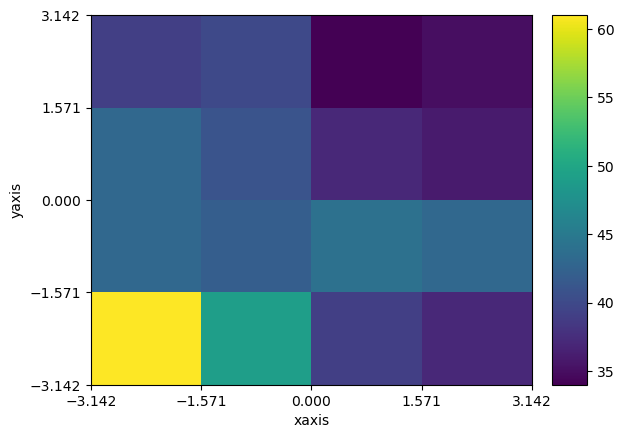

In [13]:
hist_output["rvg_lep_phi;1"].to_hist().plot()

In [14]:
hist_output["rvg_lep_phi;1"].to_numpy()

(array([[61., 43., 43., 39.],
        [49., 42., 41., 40.],
        [39., 44., 37., 34.],
        [37., 43., 36., 35.]]),
 array([-3.14159265, -1.57079633,  0.        ,  1.57079633,  3.14159265]),
 array([-3.14159265, -1.57079633,  0.        ,  1.57079633,  3.14159265]))

In [202]:
step0 = minitree["Step0"]
step7 = minitree["Step7"]
#step8 = minitree["Step8"]

In [204]:
step7.keys()

['HT',
 'ST',
 'MET',
 'HT_check',
 'MET_phi',
 'l_pt',
 'l_eta',
 'l_phi',
 'l_mass',
 'sl_pt',
 'sl_eta',
 'sl_phi',
 'sl_mass',
 'e_pt',
 'e_eta',
 'e_phi',
 'e_charge',
 'mu_pt',
 'mu_eta',
 'mu_phi',
 'mu_charge',
 'lep_pt',
 'lep_eta',
 'lep_phi',
 'lep_mass',
 'lep_pdgid',
 'alep_pt',
 'alep_eta',
 'alep_phi',
 'alep_mass',
 'alep_pdgid',
 'lep_nearest_pt',
 'lep_nearest_eta',
 'lep_nearest_phi',
 'lep_nearest_mass',
 'lep_nearest_pdgid',
 'alep_nearest_pt',
 'alep_nearest_eta',
 'alep_nearest_phi',
 'alep_nearest_mass',
 'alep_nearest_pdgid',
 'ljet_pt',
 'ljet_eta',
 'ljet_phi',
 'ljet_mass',
 'sljet_pt',
 'sljet_eta',
 'sljet_phi',
 'sljet_mass',
 'bjet_nearest_pt',
 'bjet_nearest_eta',
 'bjet_nearest_phi',
 'bjet_nearest_mass',
 'abjet_nearest_pt',
 'abjet_nearest_eta',
 'abjet_nearest_phi',
 'abjet_nearest_mass',
 'llbar_deta',
 'llbar_dphi',
 'bbbar_deta',
 'bbbar_dphi',
 'weight_size',
 'weight',
 'jet_size',
 'jet_btag',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_mass',
 '

In [16]:
step7.arrays(filter_name="/lep_|gen_lep_nearest_/", library="pd")

,lep_pt,lep_eta,lep_phi,lep_mass,lep_pdgid,lep_nearest_pt,lep_nearest_eta,lep_nearest_phi,lep_nearest_mass,lep_nearest_pdgid,gen_lep_nearest_pt,gen_lep_nearest_eta,gen_lep_nearest_phi,gen_lep_nearest_mass,gen_lep_nearest_pdgid,gen_lep_nearest_status
0,66.218353,1.734637,-2.520759,2.697398e-06,13.0,66.218353,1.734637,-2.520759,2.697398e-06,13.0,64.662697,1.733335,-2.521996,0.105660,13.0,1.0
1,65.245667,0.039140,-2.804378,0.000000e+00,13.0,65.245667,0.039140,-2.804378,0.000000e+00,13.0,65.072426,0.041790,-2.800287,0.105660,13.0,1.0
2,27.547951,-0.550355,1.192465,3.371748e-07,13.0,27.547951,-0.550355,1.192465,3.371748e-07,13.0,27.520525,-0.552853,1.187650,0.105660,13.0,1.0
3,40.739445,0.604230,2.464903,0.000000e+00,13.0,40.739445,0.604230,2.464903,0.000000e+00,13.0,106.619370,0.628919,2.463731,1.777000,15.0,2.0
4,22.748642,-0.175470,-2.329626,3.371748e-07,11.0,22.748642,-0.175470,-2.329626,3.371748e-07,11.0,22.723522,-0.178757,-2.328895,0.000511,11.0,1.0
5,36.686981,0.387211,0.747310,0.000000e+00,11.0,36.686981,0.387211,0.747310,0.000000e+00,11.0,37.252735,0.389796,0.745608,0.000511,11.0,1.0
6,52.393906,2.004509,-3.059903,0.000000e+00,11.0,52.393906,2.004509,-3.059903,0.000000e+00,11.0,52.584892,2.006357,-3.058085,0.000511,11.0,1.0
7,46.554691,-0.759963,2.168606,0.000000e+00,13.0,46.554691,-0.759963,2.168606,0.000000e+00,13.0,46.132767,-0.759623,2.169407,0.105660,13.0,1.0
8,82.641624,0.417567,1.600213,9.536743e-07,13.0,82.641624,0.417567,1.600213,9.536743e-07,13.0,82.474594,0.416860,1.599241,0.105660,13.0,1.0
9,30.871178,0.815829,-1.771975,0.000000e+00,11.0,30.871178,0.815829,-1.771975,0.000000e+00,11.0,31.358578,0.819186,-1.779665,0.000511,11.0,1.0


In [17]:
step7.arrays(filter_name="/lep_pt|gen_lep_nearest_pt/", library="pd")

,lep_pt,gen_lep_nearest_pt
0,66.218353,64.662697
1,65.245667,65.072426
2,27.547951,27.520525
3,40.739445,106.619370
4,22.748642,22.723522
5,36.686981,37.252735
6,52.393906,52.584892
7,46.554691,46.132767
8,82.641624,82.474594
9,30.871178,31.358578


In [18]:
step7.arrays(filter_name="/lep_eta|gen_lep_nearest_eta/", library="pd")

,lep_eta,gen_lep_nearest_eta
0,1.734637,1.733335
1,0.039140,0.041790
2,-0.550355,-0.552853
3,0.604230,0.628919
4,-0.175470,-0.178757
5,0.387211,0.389796
6,2.004509,2.006357
7,-0.759963,-0.759623
8,0.417567,0.416860
9,0.815829,0.819186


In [19]:
step7.arrays(filter_name="/lep_phi|gen_lep_nearest_phi/", library="pd")

,lep_phi,gen_lep_nearest_phi
0,-2.520759,-2.521996
1,-2.804378,-2.800287
2,1.192465,1.187650
3,2.464903,2.463731
4,-2.329626,-2.328895
5,0.747310,0.745608
6,-3.059903,-3.058085
7,2.168606,2.169407
8,1.600213,1.599241
9,-1.771975,-1.779665


In [20]:
step7.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
HT                   | float                    | AsDtype('>f4')
ST                   | float                    | AsDtype('>f4')
MET                  | float                    | AsDtype('>f4')
HT_check             | float                    | AsDtype('>f4')
MET_phi              | float                    | AsDtype('>f4')
l_pt                 | float                    | AsDtype('>f4')
l_eta                | float                    | AsDtype('>f4')
l_phi                | float                    | AsDtype('>f4')
l_mass               | float                    | AsDtype('>f4')
sl_pt                | float                    | AsDtype('>f4')
sl_eta               | float                    | AsDtype('>f4')
sl_phi               | float                    | AsDtype('>f4')
sl_mass              | float                    | AsDtype(

In [24]:
#step8.arrays(["lep_pdgid","gen_lep_nearest_pdgid"],library="pd")

,lep_pdgid,gen_lep_nearest_pdgid
0,13.0,13.0
1,13.0,13.0
2,13.0,13.0
3,13.0,15.0
4,11.0,11.0
5,11.0,11.0
6,13.0,13.0
7,13.0,13.0
8,11.0,11.0
9,11.0,11.0


In [25]:
step7.arrays(["lep_pdgid","gen_lep_nearest_pdgid"],library="pd")

,lep_pdgid,gen_lep_nearest_pdgid
0,13.0,13.0
1,13.0,13.0
2,13.0,13.0
3,13.0,15.0
4,11.0,11.0
5,11.0,11.0
6,11.0,11.0
7,13.0,13.0
8,13.0,13.0
9,11.0,11.0


In [23]:
step7.arrays(filter_name="/weight/", library="pd")

weight_size    weight
entry subentry                       
0     0                 446  0.018449
      1                 446  0.018240
      2                 446  0.018578
      3                 446  0.015393
      4                 446  0.015219
...                     ...       ...
726   441               446  0.015366
      442               446  0.015334
      443               446  0.015469
      444               446  0.015399
      445               446  0.015823

[324242 rows x 2 columns]